In [1]:
### Imports des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns


<h1>Importation des données</h1>

In [2]:
### Simulation de données en 2D séparables linéairement
#heartData = pd.read_csv('heart_statlog.csv')
heartData = pd.read_csv('HeartData.csv', header= None)
# Renommage des colonnes 
heartData.columns = ['age', 'sex', 'chest_pain', 'blood_press', 
                     'serum_chol', 'blood_sugar', 'electrocard', 
                     'max_heart_rate', 'induced_ang', 'oldpeak', 
                     'peak_st_seg', 'major_ves', 'thal', 'presence']

# Decoupage de dataset pour les features et label
x = heartData.drop('presence', axis=1)
y = heartData['presence'].copy()

# affichage des infos
heartData.info


<bound method DataFrame.info of      age  sex  chest_pain  blood_press  serum_chol  blood_sugar  electrocard  \
0     70    1           4          130         322            0            2   
1     67    0           3          115         564            0            2   
2     57    1           2          124         261            0            0   
3     64    1           4          128         263            0            0   
4     74    0           2          120         269            0            2   
..   ...  ...         ...          ...         ...          ...          ...   
265   52    1           3          172         199            1            0   
266   44    1           2          120         263            0            0   
267   56    0           2          140         294            0            2   
268   57    1           4          140         192            0            0   
269   67    1           4          160         286            0            2   

     ma

In [3]:
heartData.shape

(270, 14)

In [4]:
heartData.head(3)


,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2


In [5]:
heartData.tail(3)

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


<h2>Attribute Information:</h2>
  -- 1. age <br>      
  -- 2. sex   <br>
  -- 3. chest pain type  (4 valeurs)     <br>  
  -- 4. resting blood pressure  <br>
  -- 5. serum cholestoral in mg/dl   <br>   
  -- 6. fasting blood sugar > 120 mg/dl   <br>    
  -- 7. resting electrocardiographic results  (valeurs 0,1,2) <br>
  -- 8. maximum heart rate achieved  <br>
  -- 9. exercise induced angina    <br>
  -- 10. oldpeak = ST depression induced by exercise relative to rest<br>   
  -- 11. the slope of the peak exercise ST segment     <br>
  -- 12. number of major vessels (0-3) colored by flourosopy       <br> 
  -- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect <br>   
  -- 14. presence 1 or 2<br>


<h1>Analyse des données:</h1>

<h4>Distribution of Heart disease</h4>


In [6]:
malade = (heartData.presence == 2)
print("Nomre de gens atteintes de cardiopathie:",malade.sum())
nonMalade = (heartData.presence == 1)
print("Nomre de gens non atteintes de cardiopathie:",nonMalade.sum())

Nomre de gens atteintes de cardiopathie: 120
Nomre de gens non atteintes de cardiopathie: 150


<h4>Matrice de corrélation:</h4>
Pour afficher la corrélation entre les differente données

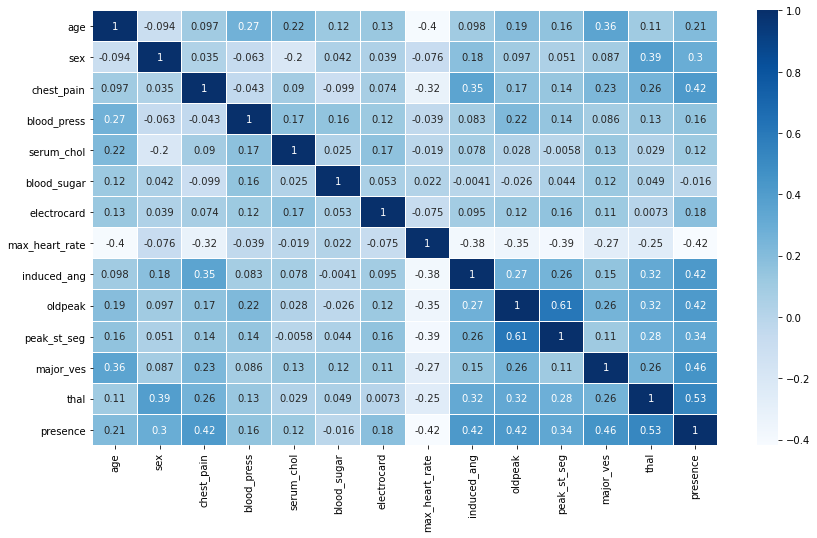

In [7]:
import seaborn as sns
corr_matrix = heartData.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, linewidths=.01, annot = True, cmap='Blues')
plt.show()

In [8]:
corr_matrix['presence'].sort_values(ascending=False)

presence          1.000000
thal              0.525020
major_ves         0.455336
induced_ang       0.419303
oldpeak           0.417967
chest_pain        0.417436
peak_st_seg       0.337616
sex               0.297721
age               0.212322
electrocard       0.182091
blood_press       0.155383
serum_chol        0.118021
blood_sugar      -0.016319
max_heart_rate   -0.418514
Name: presence, dtype: float64

<h6>Frequence d'etre malade et non malade par rapport à l'age </h6>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(92.625, 0.5, 'Frequence')

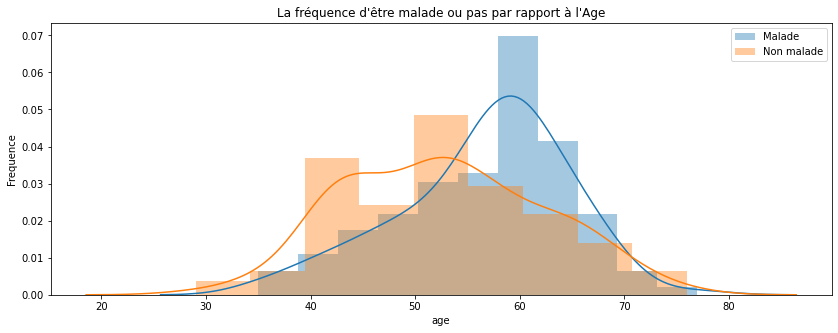

In [9]:
#Methode 1 en generale
plt.figure(figsize=(14, 5))
sns.distplot(heartData[heartData['presence'] == 2]['age'], label= "Malade")
sns.distplot(heartData[heartData['presence'] == 1]['age'], label= "Non malade")
plt.legend()
plt.title("La fréquence d'être malade ou pas par rapport à l'Age")
plt.savefig("FrequencegeneralAge.png") 
plt.ylabel('Frequence')


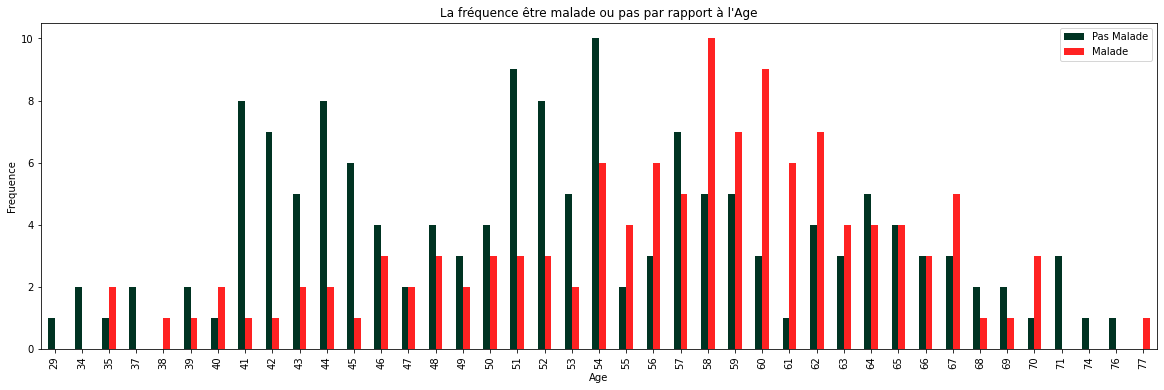

In [11]:
#Methode 2 detaillé
pd.crosstab(heartData['age'],heartData['presence']).plot(kind="bar",figsize=(20,6),color=['#003322','#FF2222'])
plt.title("La fréquence être malade ou pas par rapport à l'Age")
plt.xlabel('Age')
plt.legend(["Pas Malade", "Malade"])
plt.savefig("FrequenceAge.png") 
plt.ylabel('Frequence')
plt.show()

<h6>Frequence de malade ou pas par rapport douleur thoracique</h6>


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


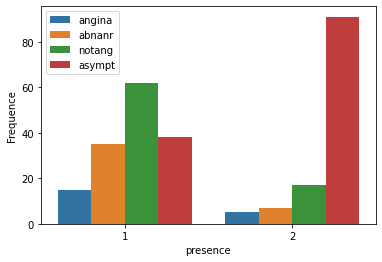

In [12]:
sns.countplot(heartData['presence'], hue = heartData['chest_pain']);
plt.ylabel('Frequence')
plt.legend(["angina", "abnanr","notang","asympt"])
plt.savefig("douleurThoracique.png") 


<h6>Frequence de malade ou pas par rapport à la Glécimie à jeun ( Fasting Blood Sugar FBS)</h6>


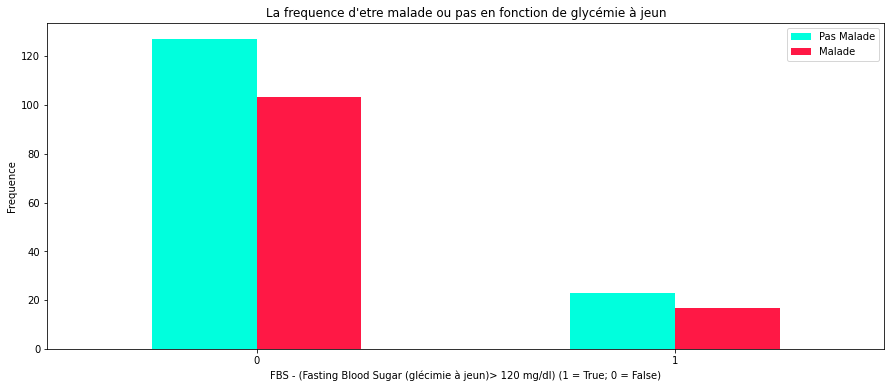

In [13]:
pd.crosstab(heartData.blood_sugar,heartData.presence).plot(kind="bar",figsize=(15,6),color=['#00FFDD','#FF1845' ])
plt.title("La frequence d'etre malade ou pas en fonction de glycémie à jeun")
plt.xlabel('FBS - (Fasting Blood Sugar (glécimie à jeun)> 120 mg/dl) (1 = True; 0 = False)')
plt.xticks(rotation = 0)
plt.legend(["Pas Malade", "Malade"])
plt.ylabel("Frequence")
plt.savefig("Glecimie à jeun maladie.png") 
plt.show()


<h6>Frequence de malade ou pas par rapport au sex</h6>

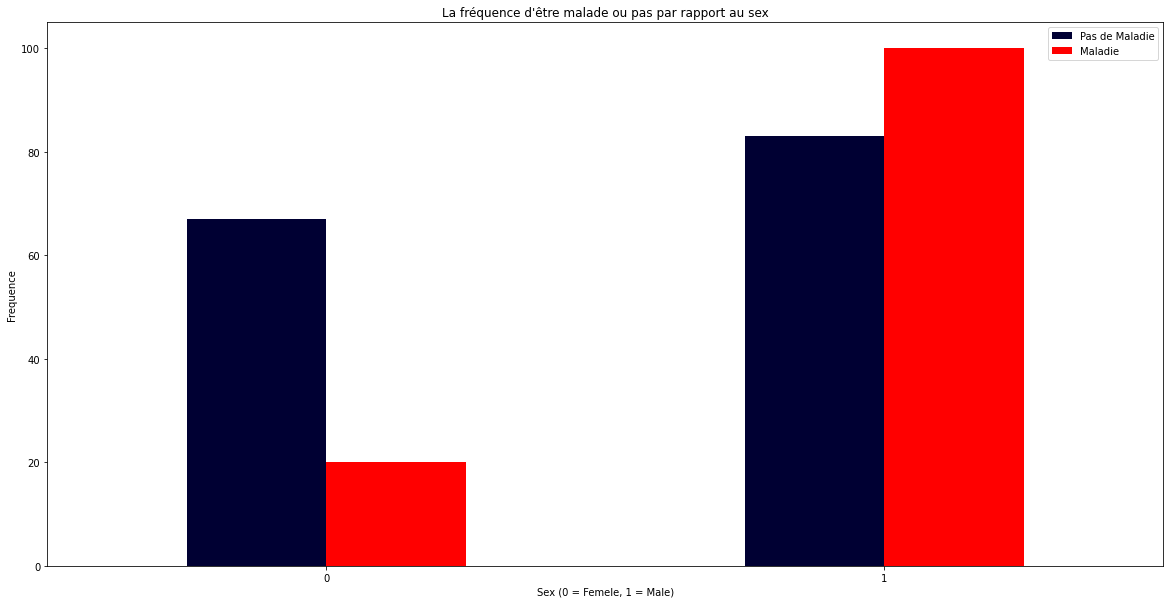

In [14]:
pd.crosstab(heartData['sex'],heartData['presence']).plot(kind="bar",figsize=(20,10),color=['#000033','red' ])
plt.title("La fréquence d'être malade ou pas par rapport au sex")
plt.xlabel('Sex (0 = Femele, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Pas de Maladie", "Maladie"])
plt.ylabel('Frequence')
plt.savefig("ParRapportAuSEX.png") 
plt.show()



<h6>Frequence de malade ou pas par rapport à la thaléssimie</h6>

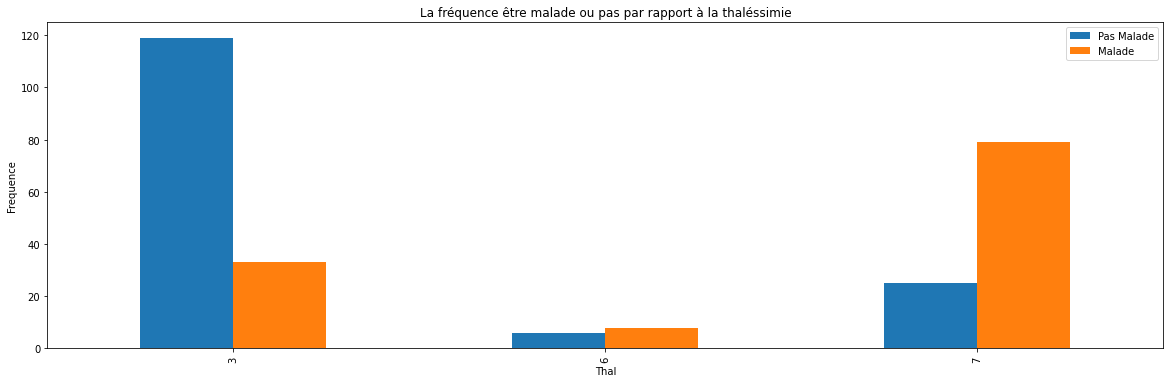

In [15]:
pd.crosstab(heartData['thal'],heartData['presence']).plot(kind="bar",figsize=(20,6))
plt.title("La fréquence être malade ou pas par rapport à la thaléssimie")
plt.xlabel('Thal')
plt.legend(["Pas Malade", "Malade"])
plt.savefig("ThalMalade.png") 
plt.ylabel('Frequence')
plt.show()

<h1> Découpage des datasets et leur normalization</h1>

In [16]:
# Decoupage de dataset pour les features et label
x = heartData.drop('presence', axis=1)
y = heartData['presence'].copy()

In [17]:
from sklearn.model_selection import train_test_split  
# Split des données à entrainer et à tester
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, shuffle=False,random_state=0)  


In [18]:
from sklearn.preprocessing import StandardScaler    
# Normalisation des données avec meanScaler(StandardScaler)
meanS_x= StandardScaler()    
x_train= meanS_x.fit_transform(x_train)  

x_test= meanS_x.transform(x_test)  


In [19]:
def plot_boundary(classifier, X, y):
    import seaborn as sns
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    X1, X2 = np.meshgrid(np.arange(start = X[:, 4].min() - 1, stop = X[:, 4].max() + 1, step = 0.01),
                     np.arange(start = X[:, 7].min() - 1, stop = X[:, 7].max() + 1, step = 0.01))
    Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(11)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
    pred = classifier.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
    plt.contourf(X1, X2, pred,
             alpha = 0.75,   cmap = 'winter')
    sns.scatterplot(X[:,4], 
                X[:,7], 
                hue=y, 
                cmap = 'coolwarm',
                s=30,style=y);
    plt.title('Score : ' + str(classifier.score(X,y)))
    plt.xlabel('Cholesterol')
    plt.ylabel('Blood_pressure')

<h1>GridSearchCV Lineaire SVM</h1>

In [20]:
### Procédure d'estimation d'un SVM linéaire pour différentes valeurs de C
### -> GridSearchCV

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['linear'], 'C': [ 0.1 ,1 ,10,100 ]}

svc = svm.SVC(kernel='linear',class_weight='balanced')
grid=GridSearchCV(svc, params  ,refit=True)

Xfit=grid.fit(x_train, y_train)

print("Le meilleur parametre est : ",grid.best_params_)
print("Accurancy est : " ,grid.score(x_train, y_train))

Le meilleur parametre est :  {'C': 0.1, 'kernel': 'linear'}
Accurancy est :  0.8564356435643564


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


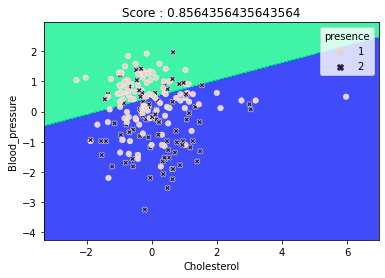

In [21]:
plot_boundary(grid,x_train,y_train)
#plt.savefig("pltLinear.png") 
plt.show()

tn : 34  fp : 4  fn:  6  tp : 24
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        38
           2       0.86      0.80      0.83        30

    accuracy                           0.85        68
   macro avg       0.85      0.85      0.85        68
weighted avg       0.85      0.85      0.85        68

Le Taux d'erreur est :  0.14705882352941177
Confusion matrix
[[34  4]
 [ 6 24]]


<AxesSubplot:>

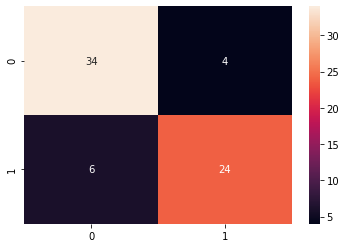

In [22]:
### Résultats de test pour les meilleurs paramètres
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


y_pred=grid.predict(x_test)

tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)
print(classification_report(y_test, y_pred))
print("Le Taux d'erreur est : ",(fp+fn)/(tn+tp+fp+fn))

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)


<h3>Linear GridSearchCV avec Pénalisation:</h3>

Le meilleur parametre est :  {'C': 10, 'kernel': 'linear'}
Accuracy est :  0.6752629510095995


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


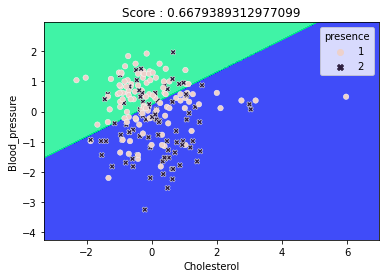

tn : 34  fp : 4  fn:  5  tp : 25
              precision    recall  f1-score   support

           1       0.87      0.89      0.88        38
           2       0.86      0.83      0.85        30

    accuracy                           0.87        68
   macro avg       0.87      0.86      0.87        68
weighted avg       0.87      0.87      0.87        68

Le Taux d'erreur est :  0.32954545454545453
Confusion matrix
[[34  4]
 [ 5 25]]


<AxesSubplot:>

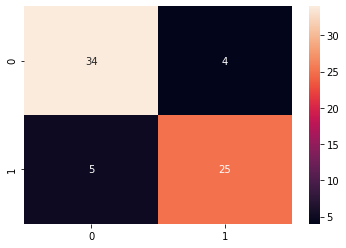

In [23]:
from sklearn.metrics import  make_scorer
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['linear'], 'C': [ 0.1 ,1 ,10,100 ]}


def metric_penalize(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    return ((5*fn) + tn )/( tn+ fp +tp+(5*fn))


grid=GridSearchCV(SVC(kernel='linear',class_weight='balanced'), params ,refit=True, scoring=make_scorer(metric_penalize, greater_is_better=True))

Xfit=grid.fit(x_train, y_train)

print("Le meilleur parametre est : ",grid.best_params_)
print("Accuracy est : " ,grid.best_score_ )

plot_boundary(grid,x_train,y_train)
plt.show()

### Résultats de test pour les meilleurs paramètres
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


y_pred=grid.predict(x_test)

tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)
print(classification_report(y_test, y_pred))
print("Le Taux d'erreur est : ",(fp+5*fn)/(tn+tp+fp+5*fn))

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
